In [ ]:
# For use on Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['signature.png', 'Monopoly Project', 'CS187', 'main.py', 'MC', 'Semester 7', 'CS3750', 'Su di me.gslides', 'filtered-0BB13395-7717-4316-A7C0-7A95B32F66AB.MP4', 'Italian Final Project', '3650 Final Project Report.gdoc', 'Cape Cod Recap 2023', 'Sport Programs Staff', 'Semester 8', 'CS3540', 'Chill Driver Certification Information.gdoc', 'CS3660_NetSec_HW5_mgaetano.ipynb', 'rf.ipynb', 'train.json', 'CNN.ipynb']


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Reading in File . . .

# For use on Google Drive
# file_path = GOOGLE_DRIVE_PATH + "train.json"

file_path = "train.json"
json_data = []

df = pd.read_json(file_path, lines=True)
print(df.head())

       0.0      36.6      36.7      38.0      38.2  38.300000000000004  \
0   3.0074   81.2963   83.7169  119.6888  115.8881            413.4768   
1  13.6523  361.5547  119.7225  170.9554   84.0531            273.8909   
2   7.1155   80.2869  169.7490  149.4092  132.8215            198.8544   
3   2.0998  235.5117  161.2402  241.3578  243.2237             89.7297   
4  16.2152  384.2739  174.5714   84.3117  137.9726            261.8213   

       39.0      39.1      39.2       39.6  ...    466.0    523.0    523.1  \
0  136.8640  817.5328   86.4743   477.6116  ...  15.8853   1.5231   4.9432   
1  175.9083  665.0791  588.2624    84.1962  ...   6.9459  26.9344   9.0805   
2  150.5273  112.4005  335.4482   675.7621  ...   9.3406  18.8055   7.0021   
3  640.7394  121.9373  396.3036  1138.3905  ...  26.2306   8.1640  26.6106   
4  365.8102   96.3555  219.9515   211.2868  ...  39.9084   4.7010  50.1098   

     523.4     524.4    524.5     554.2     554.4    1046.0       target  
0   9.2590 

In [ ]:
# Combining targets that are tonally equivalent . . .

def combine_equal(df):
    tonal_equ = {
                "A#": "Bb",
                "B#": "C",
                "C#": "Db",
                "D#": "Eb",
                "E#": "F",
                "F#": "Gb",
                "G#": "Ab"
            }

    df[['note', 'modality']] = pd.DataFrame(df.target.tolist(), index=df.index)
    df["note"] = df['note'].replace(tonal_equ)
    df["target"] = df[["note", "modality"]].astype(str).apply(' '.join, axis=1)
    df.drop(["note", "modality"], axis=1, inplace=True)

combine_equal(df)

In [ ]:
# Splitting into train test validation sets
X = df.drop('target', axis=1).values
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])
y = df['target_encoded'].values
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Testing function for the data split

print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)
x_train

Training x: (7877, 1000) y: (7877,)
Testing x: (1970, 1000) y: (1970,)


array([[  0.3821,   0.497 ,   0.7169, ...,   4.9492,   0.896 ,   3.2916],
       [ 16.4461,  55.8946,  54.2504, ..., 163.5266, 155.7604,  10.2477],
       [  5.2831,   7.8013,   9.3183, ..., 104.2608, 134.1521,  32.3494],
       ...,
       [  5.6634,  25.6487,  38.779 , ...,  50.1856,  43.7502, 206.6477],
       [ 31.726 ,   7.6548,  39.6652, ..., 162.1529, 186.4395,  19.2206],
       [  0.3202, 169.3784,  94.1028, ...,  57.3187,  35.3127,  13.3427]])

In [ ]:
# Testing decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
score

0.23147208121827412

In [ ]:
# Random Forest
x_train = normalize(x_train)
x_test = normalize(x_test)

cls = RandomForestClassifier()
cls.fit(x_train, y_train)

score = cls.score(x_test, y_test)
score

0.6060913705583756

Index(['0.0', '36.6', '36.7', '38.0', '38.2', '38.300000000000004', '39.0',
       '39.1', '39.2', '39.6',
       ...
       '441.0', '466.0', '523.0', '523.1', '523.4', '524.4', '524.5', '554.2',
       '554.4', '1046.0'],
      dtype='object', length=1000)


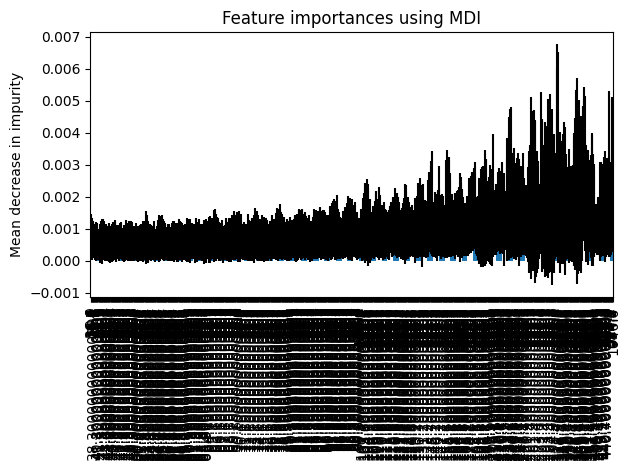

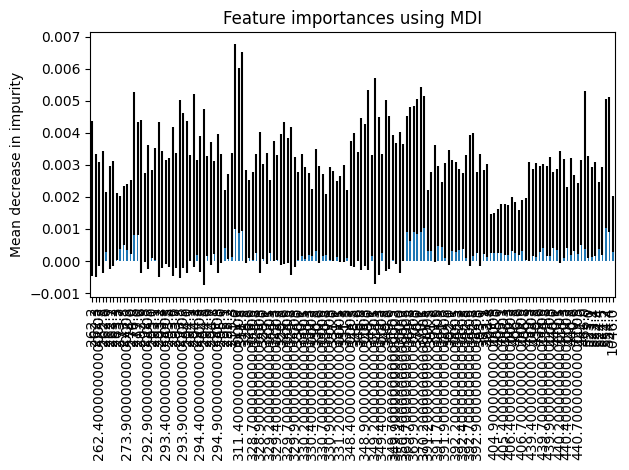

In [ ]:
# Calculating feature importances
importances = cls.feature_importances_
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

features = df.drop('target', axis=1)
features = features.drop('target_encoded', axis=1)
print(features.columns)

# Plotting feature importances
forest_importances = pd.Series(importances, index=features.columns)
forest_importances_shrunk = forest_importances[forest_importances.keys()[-150:]]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig, ax = plt.subplots()
forest_importances_shrunk.plot.bar(yerr=std[-150:], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()